## PART 04: TELCO CUSTOMER CHURN ANALYSIS

#### Author: GREJELL B. SEGURA
#### Date: August 04, 2020

#### NOTE:  
##### This notebook is the continuation of the Churn Analysis. This covers the final model selection and training.

## Contents

* [1.  Model Comparison (Feature Engineered Data vs. Clean Data](#mod-compare)    
* [2.  Training in New Data](#tuning)
    * [2.1.  Adaboost](#ada)
    * [2.2.  Logistic Regression](#lr)
    * [2.3.  Light GBM](#lgb)
    * [2.4.  XGBoost](#xgb)
    * [2.5.  Naive Bayes](#nb)
* [3.  Holdout Data Testing](#holdout)
* [4.  Blender Model](#blending)
* [5.  Final Model Selection](#selection)

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import metrics

from IPython.display import Image


from pycaret.classification import *

In [2]:
os.chdir(r'/home/grejell/Projects/arab-bank-test-churn-analysis')

X_train = pd.read_pickle('./data/new_X_train.pkl')
Y_train = pd.read_pickle('./data/new_Y_train.pkl')
x_test = pd.read_pickle('./data/new_x_test.pkl')
y_test = pd.read_pickle('./data/new_y_test.pkl')

In [3]:
data = pd.concat([X_train, Y_train], axis=1)
data = data.rename(columns={'labels':'target'})

<a id="mod-compare"></a>
## 1. Model Comparison (Feature Engineered Data vs. Clean Data)

Below are the models ran in pycaret.  
These models are not yet tuned.  
It has been cross validated within 5 folds.  
It is sorted based on the highest AUC.

In [4]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data

best1 = compare_models(sort='AUC', whitelist=['dt','rf','xgboost','lightgbm','ada','lr','nb'], fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ada Boost Classifier,0.7778,0.8462,0.7116,0.5720,0.6336,0.4771,0.4834,0.3511
1,Logistic Regression,0.7941,0.8450,0.6291,0.6172,0.6224,0.4810,0.4816,0.0852
2,Light Gradient Boosting Machine,0.7759,0.8257,0.5930,0.5835,0.5880,0.4342,0.4343,0.2161
3,Naive Bayes,0.7201,0.8233,0.8131,0.4900,0.6110,0.4133,0.4459,0.0090
4,Extreme Gradient Boosting,0.7689,0.8133,0.5568,0.5733,0.5648,0.4076,0.4077,1.0186
5,Random Forest Classifier,0.7675,0.8041,0.5387,0.5738,0.5554,0.3983,0.3988,0.1106
6,Decision Tree Classifier,0.7171,0.6627,0.5437,0.4794,0.5093,0.3118,0.3132,0.0408


Logistic Regression is again the top model using the feature engineered data.  
  
The below table is the same table generated during the first training in Part 02 of this analysis.  
It is noticeable that the metrics improved after the feature engineering.

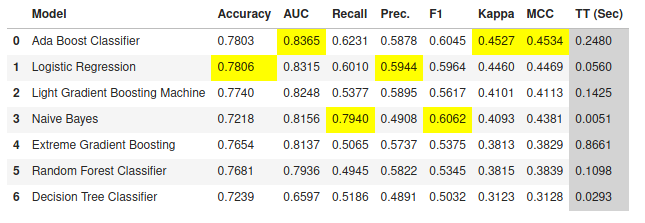

In [5]:
Image("img/tab.png")

We will again tune the top 5 models using the feature engineered data and see if the model will improve.

<a id="tuning"></a>
## 2. Training in New Data

Each model will be trained on the same parameters that was optimized in hyperparameter tuning in part 02.

<a id="ada"></a>
### 2.1 Adaboost

In [6]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
ada = create_model('ada',
                algorithm= 'SAMME.R',
                base_estimator= None,
                learning_rate= 0.17,
                n_estimators= 105,
                fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7510,0.8441,0.7739,0.5256,0.6260,0.4494,0.4683
1,0.7575,0.8338,0.7387,0.5365,0.6216,0.4496,0.4621
2,0.7642,0.8484,0.8090,0.5421,0.6492,0.4819,0.5038
3,0.7669,0.8495,0.8191,0.5452,0.6546,0.4892,0.5123
4,0.7439,0.8453,0.7638,0.5170,0.6166,0.4349,0.4536
Mean,0.7567,0.8442,0.7809,0.5333,0.6336,0.4610,0.4800
SD,0.0085,0.0056,0.0296,0.0105,0.0153,0.0209,0.0235


After tuning, the AUC was not improved. But recall, accuracy and precision were improved.

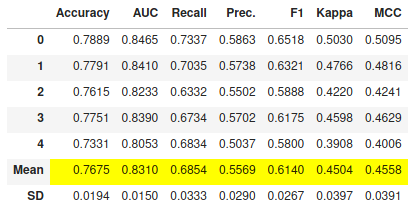

In [7]:
Image("img/ada.png")

In [8]:
plot_model(ada, plot = 'parameter')

,Parameters
algorithm,SAMME.R
base_estimator,None
learning_rate,0.17
n_estimators,105
random_state,7931


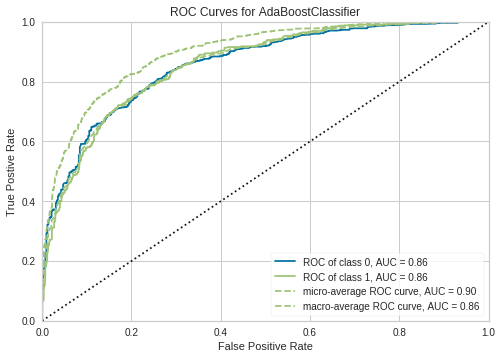

In [9]:
plot_model(ada, plot='auc')

<a id="lgb"></a>
### 2.2 Light GBM

In [10]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data

lgb = create_model('lightgbm', 
                    boosting_type='gbdt',
                    colsample_bytree= 1.0,
                    importance_type= 'split',
                    learning_rate= 0.1,
                    max_depth= 70,
                    min_child_samples= 20,
                    min_child_weight= 0.001,
                    min_split_gain= 0.6,
                    n_estimators= 70,
                    num_leaves= 10,
                    objective= None,
                    reg_alpha= 0.5,
                    reg_lambda= 0.1,
                    silent= True,
                    subsample= 1.0,
                    subsample_for_bin= 200000,
                    subsample_freq= 0,
                    fold=5
                  )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7835,0.8539,0.7236,0.5783,0.6429,0.4903,0.4966
1,0.7900,0.8633,0.6834,0.5965,0.6370,0.4902,0.4924
2,0.7846,0.8341,0.6734,0.5877,0.6276,0.4770,0.4792
3,0.8171,0.8625,0.6734,0.6569,0.6650,0.5392,0.5393
4,0.7805,0.8285,0.6332,0.5860,0.6087,0.4565,0.4571
Mean,0.7911,0.8485,0.6774,0.6011,0.6362,0.4906,0.4929
SD,0.0133,0.0145,0.0288,0.0285,0.0185,0.0273,0.0270


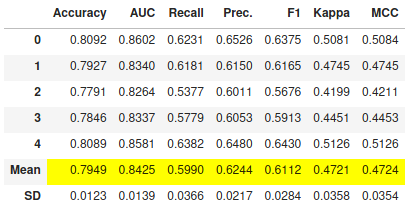

In [11]:
Image("img/lgb.png")

In [12]:
plot_model(lgb, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1
importance_type,split
learning_rate,0.1
max_depth,70
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.6
n_estimators,70


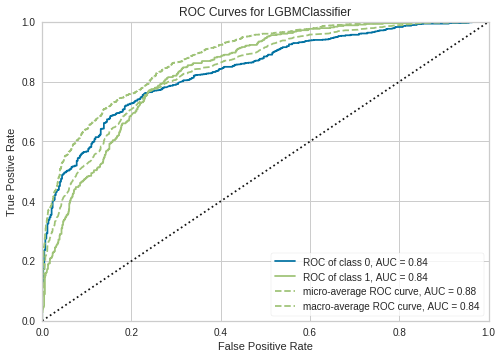

In [13]:
plot_model(lgb, plot='auc')

<a id="lr"></a>
### 2.3 Logistic Regression

In [14]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
lr = create_model('lr',
                fold=5,
                C= 6.34,
                class_weight= 'balanced',
                dual= False,
                fit_intercept= True,
                intercept_scaling= 1,
                l1_ratio= None,
                max_iter= 100,
                multi_class= 'auto',
                n_jobs= -1,
                penalty= 'l2',
                solver= 'lbfgs',
                tol= 0.0001,
                warm_start= False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7997,0.8363,0.5980,0.6364,0.6166,0.4812,0.4817
1,0.8117,0.8480,0.6332,0.6562,0.6445,0.5164,0.5166
2,0.7886,0.8291,0.5879,0.6126,0.6000,0.4564,0.4566
3,0.8035,0.8566,0.6281,0.6378,0.6329,0.4988,0.4988
4,0.7859,0.8354,0.6281,0.5981,0.6127,0.4649,0.4652
Mean,0.7979,0.8411,0.6151,0.6282,0.6213,0.4836,0.4838
SD,0.0095,0.0099,0.0184,0.0205,0.0156,0.0219,0.0219


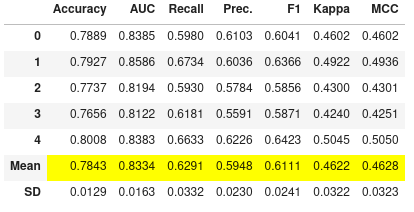

In [15]:
Image("img/lr.png")

In [16]:
plot_model(lr, plot = 'parameter')

,Parameters
C,6.34
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,-1
penalty,l2


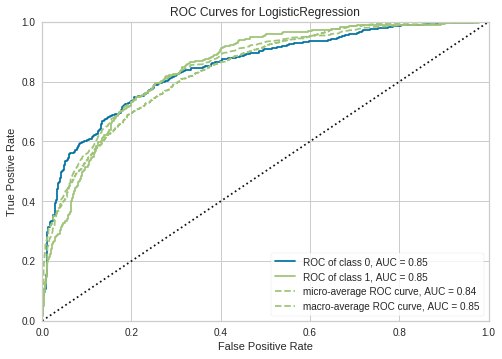

In [17]:
plot_model(lr, plot='auc')

<a id="xgb"></a>
### 2.4 XGBoost

In [18]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
xgb = create_model('xgboost',
                    fold=5,
                    objective= 'binary:logistic',
                    base_score= 0.5,
                    booster= 'gbtree',
                    colsample_bylevel= 1,
                    colsample_bynode= 1,
                    colsample_bytree= 0.5,
                    gamma= 0,
                    gpu_id= -1,
                    learning_rate= 0.01,
                    max_delta_step= 0,
                    max_depth= 80,
                    min_child_weight= 3,
                    n_estimators= 200,
                    num_parallel_tree= 1,
                    reg_alpha= 0,
                    reg_lambda= 1,
                    scale_pos_weight= 1,
                    subsample= 0.2,
                    validate_parameters=1,
                    tree_method='exact',
                    importance_type= 'gain'                    
                  )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7984,0.8745,0.7638,0.5984,0.6711,0.5288,0.5370
1,0.7818,0.8494,0.7387,0.5742,0.6462,0.4920,0.5002
2,0.7683,0.8316,0.6834,0.5574,0.6140,0.4509,0.4557
3,0.7737,0.8436,0.7839,0.5571,0.6514,0.4908,0.5065
4,0.7737,0.8541,0.7538,0.5597,0.6424,0.4821,0.4936
Mean,0.7792,0.8506,0.7447,0.5694,0.6450,0.4889,0.4986
SD,0.0105,0.0141,0.0340,0.0158,0.0184,0.0249,0.0261


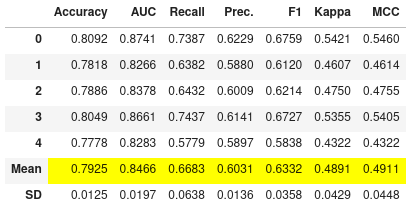

In [19]:
Image("img/xgb.png")

In [21]:
plot_model(xgb, plot = 'parameter')

,Parameters
objective,binary:logistic
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,0.5
gamma,0
gpu_id,-1
importance_type,gain
interaction_constraints,


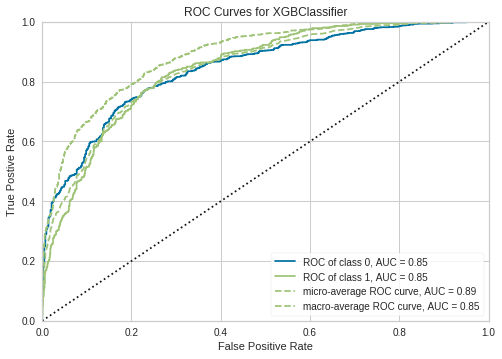

In [22]:
plot_model(xgb, plot='auc')

<a id="nb"></a>
### 2.5 Naive Bayes

In [23]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
nb = create_model('nb',
                 fold=5,
                 priors=None,
                 var_smoothing= 1e-07)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7348,0.8384,0.8392,0.5045,0.6302,0.4428,0.4777
1,0.7168,0.8044,0.7739,0.4843,0.5957,0.3951,0.4208
2,0.7276,0.8412,0.8442,0.4970,0.6257,0.4334,0.4710
3,0.7398,0.8350,0.8241,0.5109,0.6308,0.4465,0.4770
4,0.7425,0.8525,0.8191,0.5142,0.6318,0.4493,0.4782
Mean,0.7323,0.8343,0.8201,0.5022,0.6228,0.4334,0.4649
SD,0.0093,0.0161,0.0249,0.0107,0.0137,0.0199,0.0222


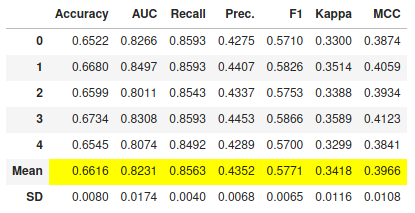

In [24]:
Image("img/nb.png")

In [26]:
plot_model(nb, plot = 'parameter')

,Parameters
priors,NaN
var_smoothing,1.000000e-07


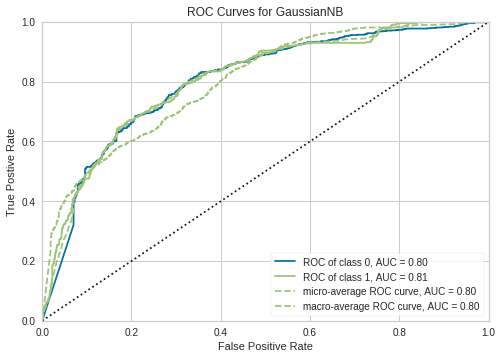

In [28]:
plot_model(nb, plot='auc')

<a id="holdout"></a>
## 3.  Holdout Data Testing

In [29]:
# save the final model
ada_final = finalize_model(ada)
lgb_final = finalize_model(lgb)
lr_final = finalize_model(lr)
xgb_final = finalize_model(xgb)
nb_final = finalize_model(nb)

# reset the index both for x_test and y_test
x_test = x_test.reset_index().drop(['index'], axis=1)
y_test = y_test.reset_index().drop(['index'], axis=1)

# predict using the hold out data
ada_preds = predict_model(ada_final, data = x_test)
lgb_preds = predict_model(lgb_final, data = x_test)
lr_preds = predict_model(lr_final, data = x_test)
xgb_preds = predict_model(xgb_final, data = x_test)
nb_preds = predict_model(nb_final, data = x_test)

# save the predicted values
ada_value = ada_preds['Label']
lgb_value = lgb_preds['Label']
lr_value = lr_preds['Label']
xgb_value = xgb_preds['Label']
nb_value = nb_preds['Label']

In [30]:
models = {'Adaboost':ada_value,'Light GBM':lgb_value,'Logistic Regression':lr_value,'XGBoost':xgb_value,'Naive Bayes':nb_value}

for name, model in models.items():
    print(' ')
    print('{}'.format(name))
    print(' ')
    print('PRECISION {}'.format(metrics.precision_score(y_test, model)))
    print('RECALL {}'.format(metrics.recall_score(y_test, model)))
    print('F1 {}'.format(metrics.f1_score(y_test, model)))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, model)
    auc_score = metrics.auc(fpr, tpr)
    print('AUC {}'.format(auc_score))
    print('ACCURACY {}'.format(metrics.accuracy_score(model, y_test)))
    print('='*50)

 
Adaboost
 
PRECISION 0.6608695652173913
RECALL 0.5100671140939598
F1 0.5757575757575758
AUC 0.7104111314176893
ACCURACY 0.8088737201365188
 
Light GBM
 
PRECISION 0.6430594900849859
RECALL 0.5078299776286354
F1 0.5675
AUC 0.7058600689058508
ACCURACY 0.8031854379977247
 
Logistic Regression
 
PRECISION 0.509915014164306
RECALL 0.8053691275167785
F1 0.6244579358196011
AUC 0.7707242281367264
ACCURACY 0.7536973833902162
 
XGBoost
 
PRECISION 0.6754385964912281
RECALL 0.5167785234899329
F1 0.5855513307984792
AUC 0.7160551656351266
ACCURACY 0.8139931740614335
 
Naive Bayes
 
PRECISION 0.45875
RECALL 0.8210290827740492
F1 0.5886126704089815
AUC 0.7453734277333253
ACCURACY 0.7081911262798635


Let us try blending the model and see if the predictions improve

<a id="blending"></a>
## 4.  Blender Model

In [39]:
blender = blend_models(estimator_list = [ada_final,lgb_final,lr_final,xgb_final,nb_final], method = 'soft', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7686,0.8576,0.7789,0.5496,0.6445,0.4804,0.4965
1,0.7615,0.8280,0.7337,0.5428,0.6239,0.4550,0.4661
2,0.7778,0.8613,0.8090,0.5610,0.6626,0.5049,0.5237
3,0.7832,0.8613,0.7789,0.5720,0.6596,0.5059,0.5189
4,0.7778,0.8632,0.7739,0.5641,0.6525,0.4950,0.5084
Mean,0.7738,0.8543,0.7749,0.5579,0.6486,0.4883,0.5027
SD,0.0077,0.0133,0.0241,0.0104,0.0138,0.0190,0.0206


In [44]:
# save the final model
blender_final = finalize_model(blender)

# predict using the hold out data
blender_preds = predict_model(blender_final, data = x_test)

# save the predicted values
blend_value = blender_preds['Label']

print(' ')
print('{}'.format('Blender Model'))
print(' ')
print('PRECISION {}'.format(metrics.precision_score(y_test, blend_value)))
print('RECALL {}'.format(metrics.recall_score(y_test, blend_value)))
print('F1 {}'.format(metrics.f1_score(y_test, blend_value)))

fpr, tpr, thresholds = metrics.roc_curve(y_test, blend_value)
auc_score = metrics.auc(fpr, tpr)
print('AUC {}'.format(auc_score))
print('ACCURACY {}'.format(metrics.accuracy_score(blend_value, y_test)))
print('='*50)

 
Blender Model
 
PRECISION 0.5188536953242836
RECALL 0.7695749440715883
F1 0.6198198198198198
AUC 0.7631246192516599
ACCURACY 0.7599544937428896


The blender model trained with the new data actually performs better than the blender model in part 02.  
However, it still is outperformed by Logistic Regression with feature engineered data.

<a id="selection"></a>
## 5. Final Model Selection

We have trained and optimized 6 models which includes the Blender model.  
Out of this 6 models, the best model based on the AUC metric is the optimized Logistic Regression.  
The model got the highest score of AUC = 0.7707242281367264 among all models tested in the Holdout dataset.  
Below are the parameters of the final model.

In [46]:
plot_model(lr_final, plot = 'parameter')

,Parameters
C,6.34
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,-1
penalty,l2
